# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-bv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s1_2016-11-14_1456
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s2_2016-11-15_1327
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s3_2016-11-15_1338
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s1_2016-11-15_1615
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s2_2016-11-15_1623
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p1_s3_2016-11-15_1636
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p2_s1_2016-12-02_1402
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p2_s2_2016-12-02_1420
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s1_2016-11-18_1444
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s2_2016-11-18_1454
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p3_s3_2016-11-18_1503
(926, 45)
Index([u'BsfL', u'BsfR', u'BvL', u'BvR', u'colorL', u'colorR', u'dirL',
     

Transforming the data set first.

In [3]:
ds.BvL = np.round(ds.BvL*60/35,1)
ds.BvR = np.round(ds.BvR*60/35,1)
ds['bvDiff'] = abs(ds['BvR'] - ds['BvL'])
ds['bvMin'] = np.amin([ds['BvL'], ds['BvR']], axis=0)
ds['bvMax'] = np.amax([ds['BvL'], ds['BvR']], axis=0)
ds['tfMin'] = ds.bvMin
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

   BsfL  BsfR   BvL  BvR     colorL     colorR  dirL  dirR      expName  \
0  0.05  0.05   0.0  2.1  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
1  0.05  0.05   1.0  0.0  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
2  0.05  0.05  16.5  4.1  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
3  0.05  0.05   2.1  0.5  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   
4  0.05  0.05   0.5  0.0  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-bv   

   fovFade  ...    tfR             time  trialN  trialT  vL  vR  bvDiff  \
0        2  ...    NaN  2016-11-14_1456       1       1   0   0     2.1   
1        2  ...    NaN  2016-11-14_1456       2       1   0   0     1.0   
2        2  ...    NaN  2016-11-14_1456       3       1   0   0    12.4   
3        2  ...    NaN  2016-11-14_1456       4       1   0   0     1.6   
4        2  ...    NaN  2016-11-14_1456       5       1   0   0     0.5   

   bvMin  bvMax  tfMin  
0    0.0    2.1    0.0  
1    0.0    1.0    0.0  
2    4.1   16.5    4.1 

## Visualization

### Proportion of trials

In [4]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0   40  0.158730  0.366151   252
1            1  131  0.519841  0.500600   252
2            2   37  0.220238  0.415646   168
3            3  109  0.429134  0.495930   254
Fast (left):
   participant  sum      mean       std  size
0            0  125  0.496032  0.500979   252
1            1   84  0.333333  0.472343   252
2            2    0  0.000000  0.000000   168
3            3  118  0.464567  0.499728   254
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   87  0.345238  0.476392   252
1            1   37  0.146825  0.354636   252
2            2  131  0.779762  0.415646   168
3            3   27  0.106299  0.308829   254


(-0.1, 1.1)

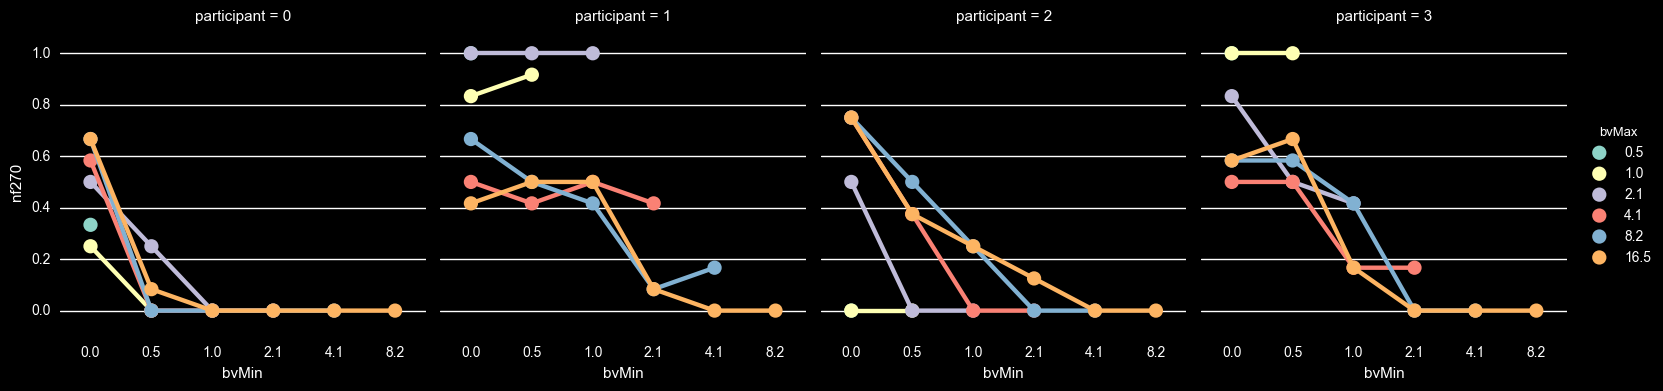

In [16]:
ssRing = ds[ds.ringSz < 258]
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=4,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Slow (down)

(-0.1, 1.1)

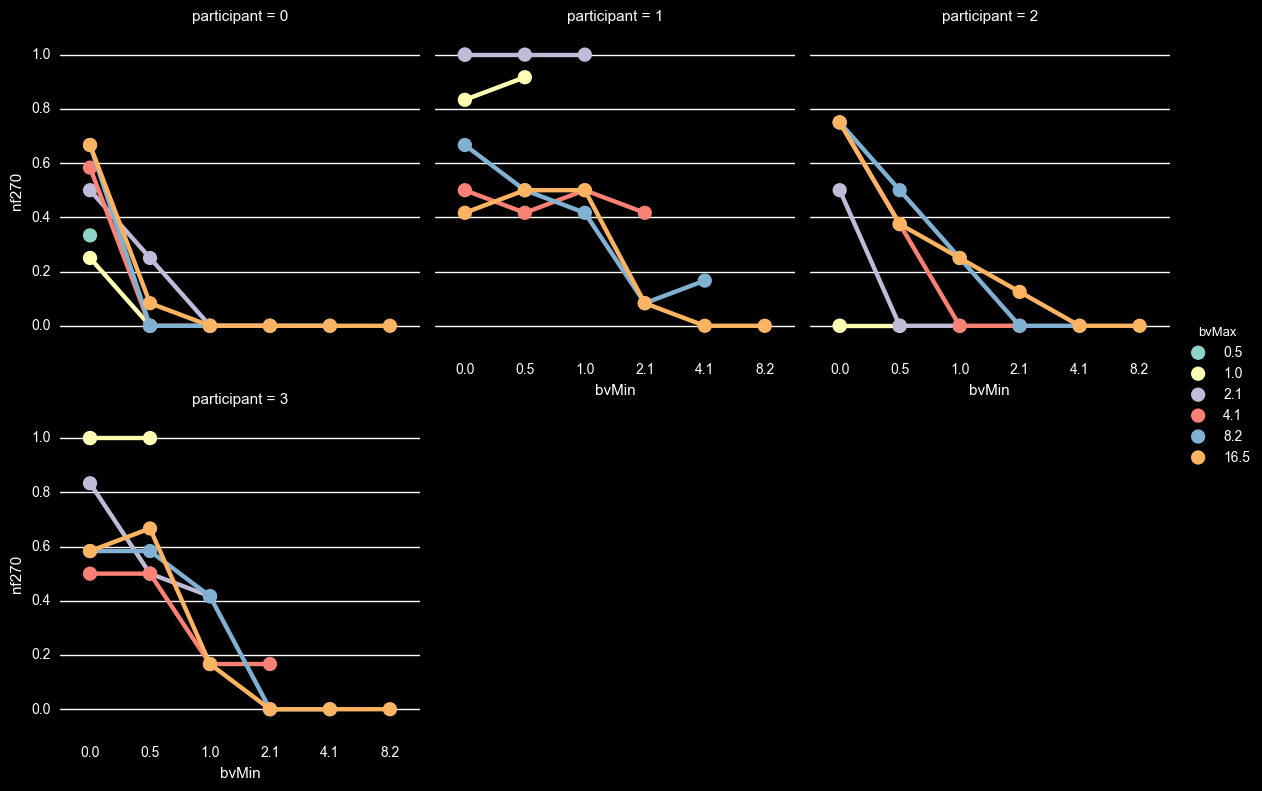

In [6]:
g = sns.factorplot(x='bvMin', y='nf270', hue='bvMax', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

With higher velocity bandwindth, the occurence of the slow center phenomenon drops sharply. However, this appears less so for when one of the competing velocities is high (4.8 and 9.6), as there are still some trials when the slow motion is still seen.

(-0.1, 1.1)

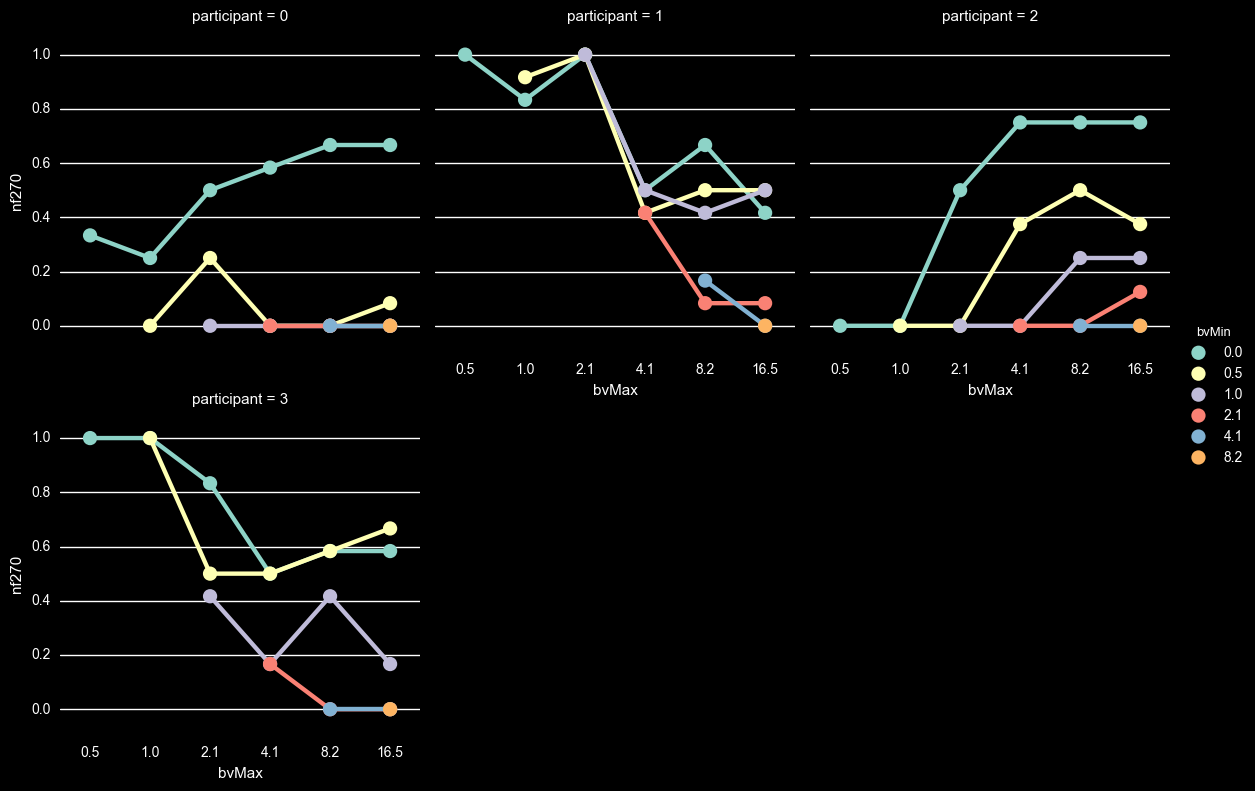

In [7]:
g = sns.factorplot(x='bvMax', y='nf270', hue='bvMin', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Fast (left)

(-0.1, 1.1)

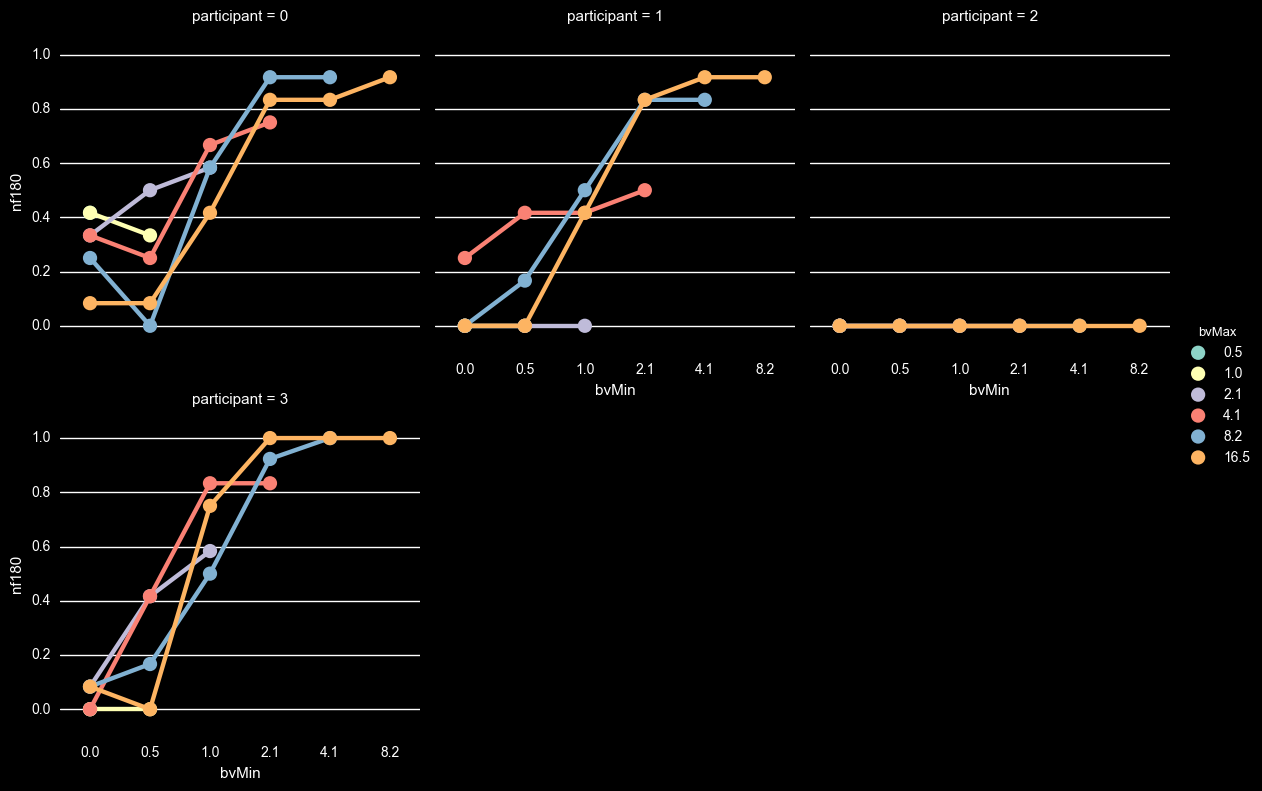

In [8]:
g = sns.factorplot(x='bvMin', y='nf180', hue='bvMax', col='participant', col_wrap=3, 
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

As the velocity bandwidth increases, the dominance of fast velocity is more obvious.

(-0.1, 1.1)

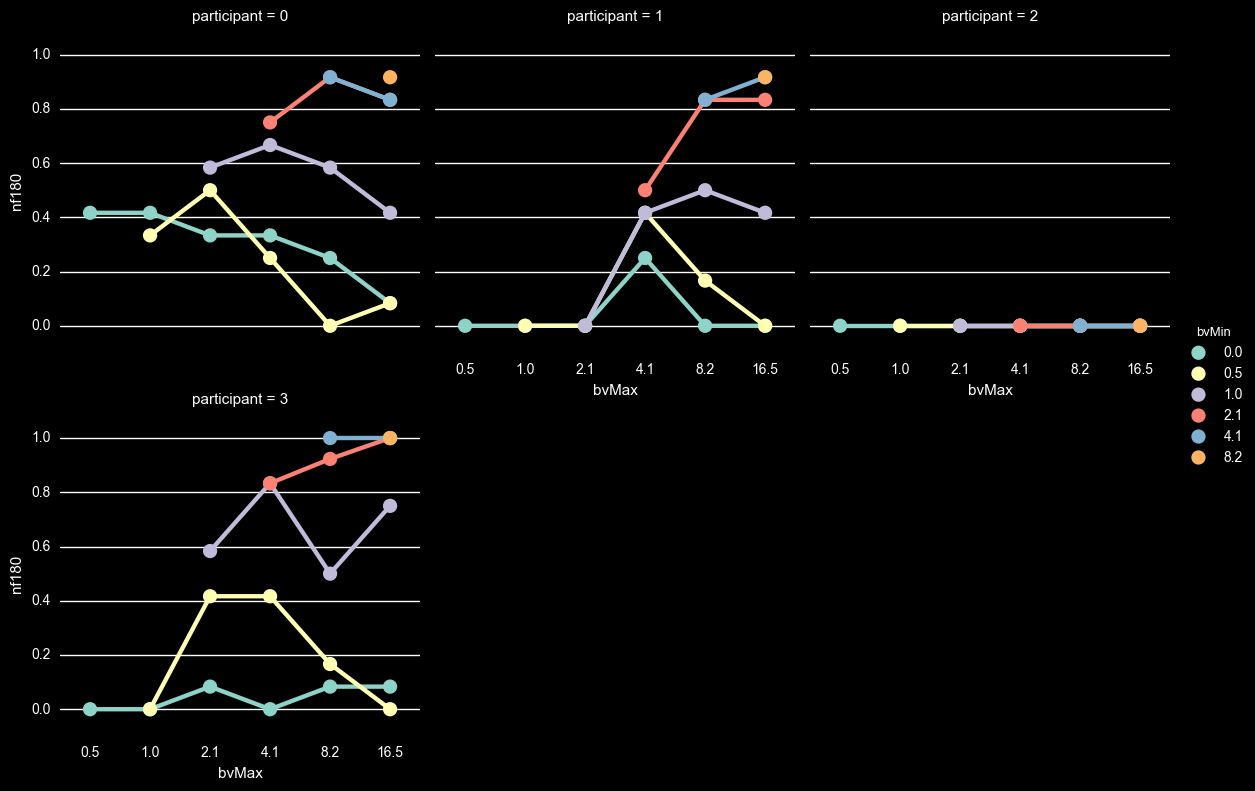

In [9]:
g = sns.factorplot(x='bvMax', y='nf180', hue='bvMin', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

#### Patchy/transparent (up)

(-0.1, 1.1)

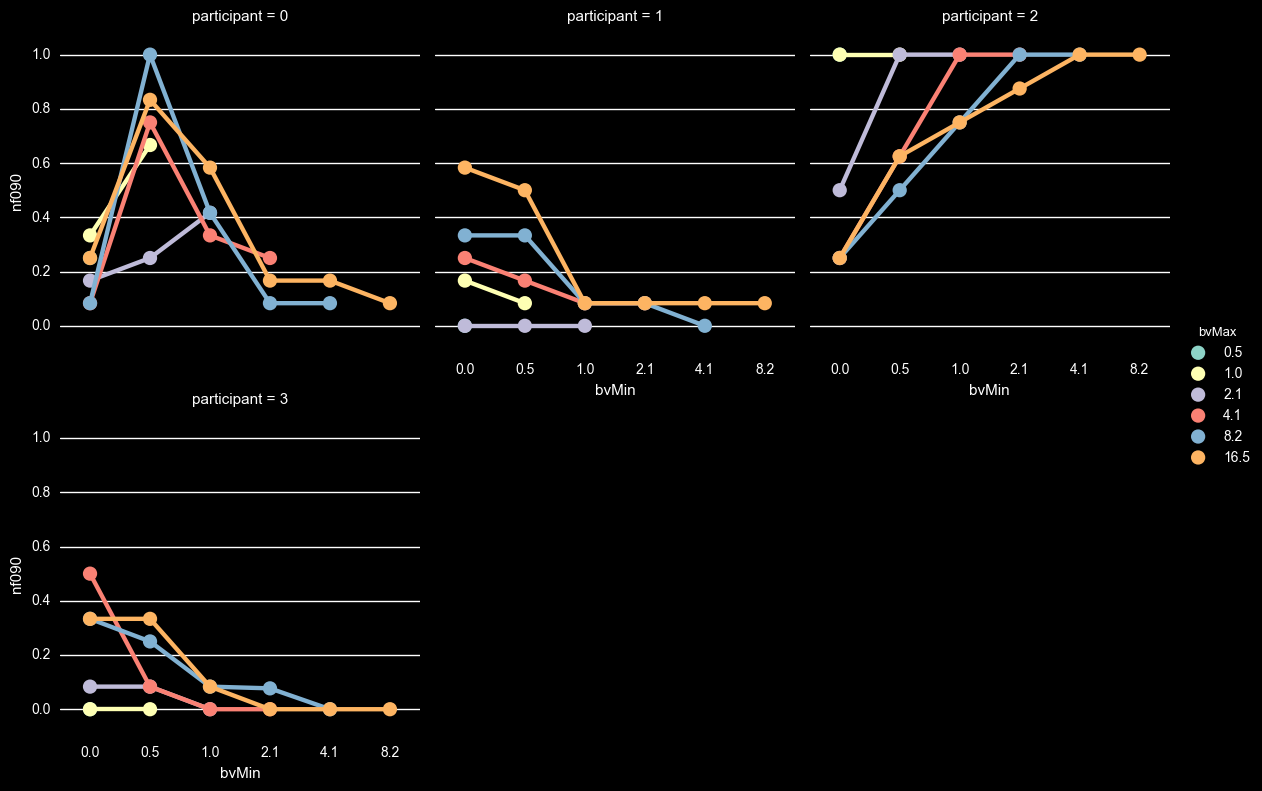

In [10]:
g = sns.factorplot(x='bvMin', y='nf090', hue='bvMax', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

At the intermediate velocity bandwidth of .3, there are many 'patchy' trials. This occurs whenever one of the competing patterns is fast (2.4 or above).

(-0.1, 1.1)

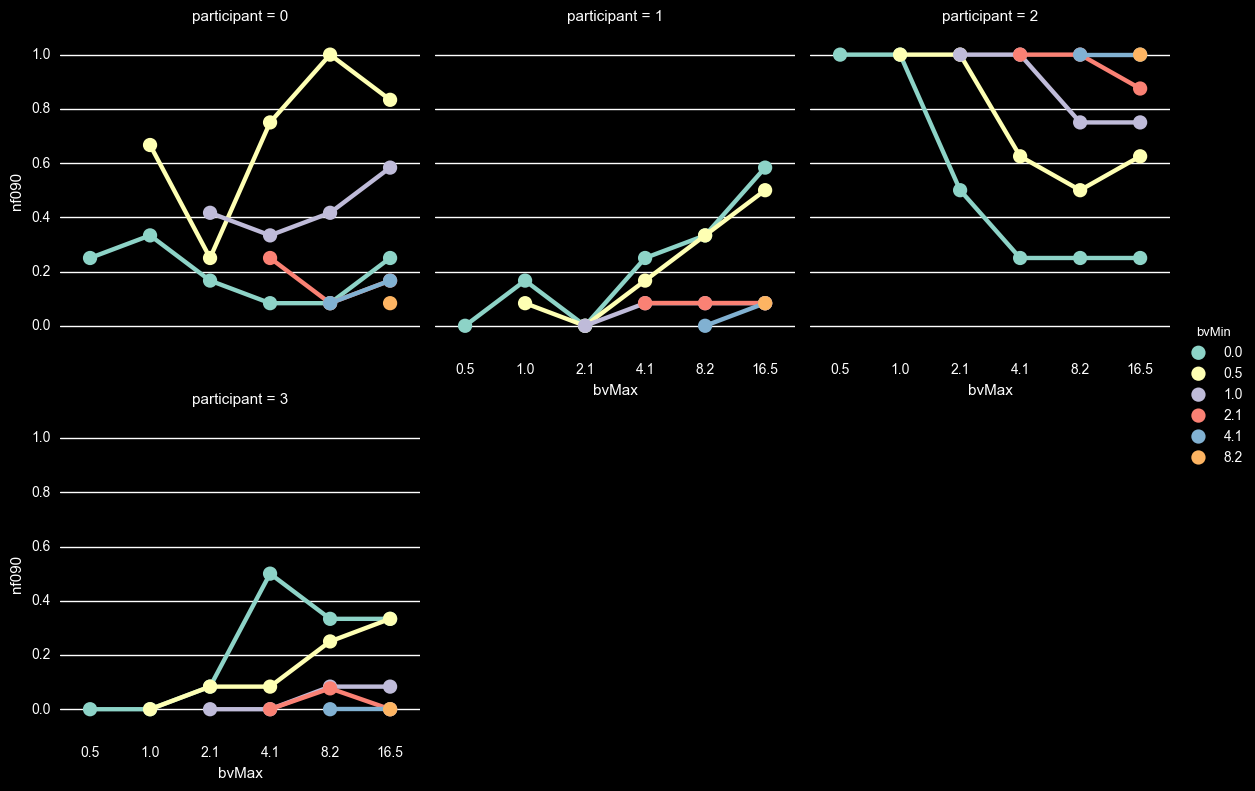

In [11]:
g = sns.factorplot(x='bvMax', y='nf090', hue='bvMin', col='participant', col_wrap=3,
                   data=ds, ci=None, size=4, dodge=.0)
plt.ylim(-0.1,1.1)

### Ring size

#### Slow (down)

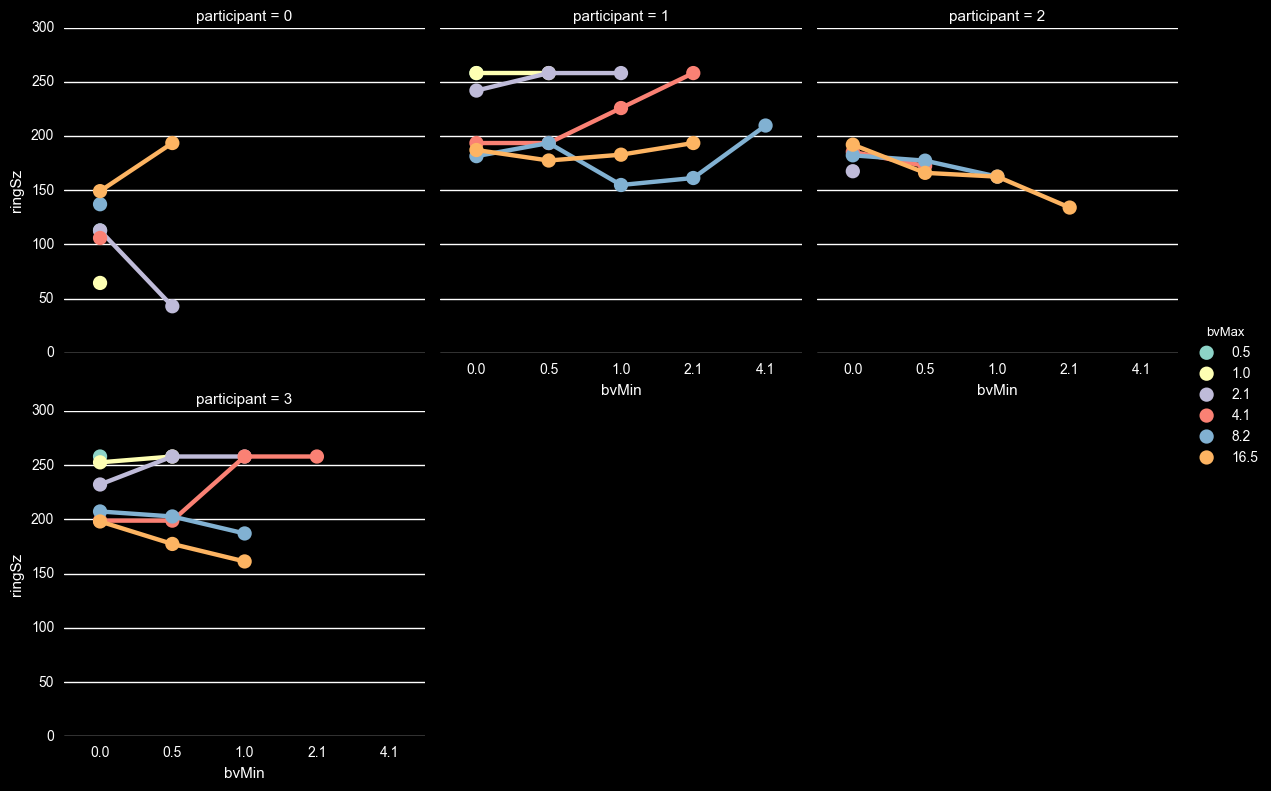

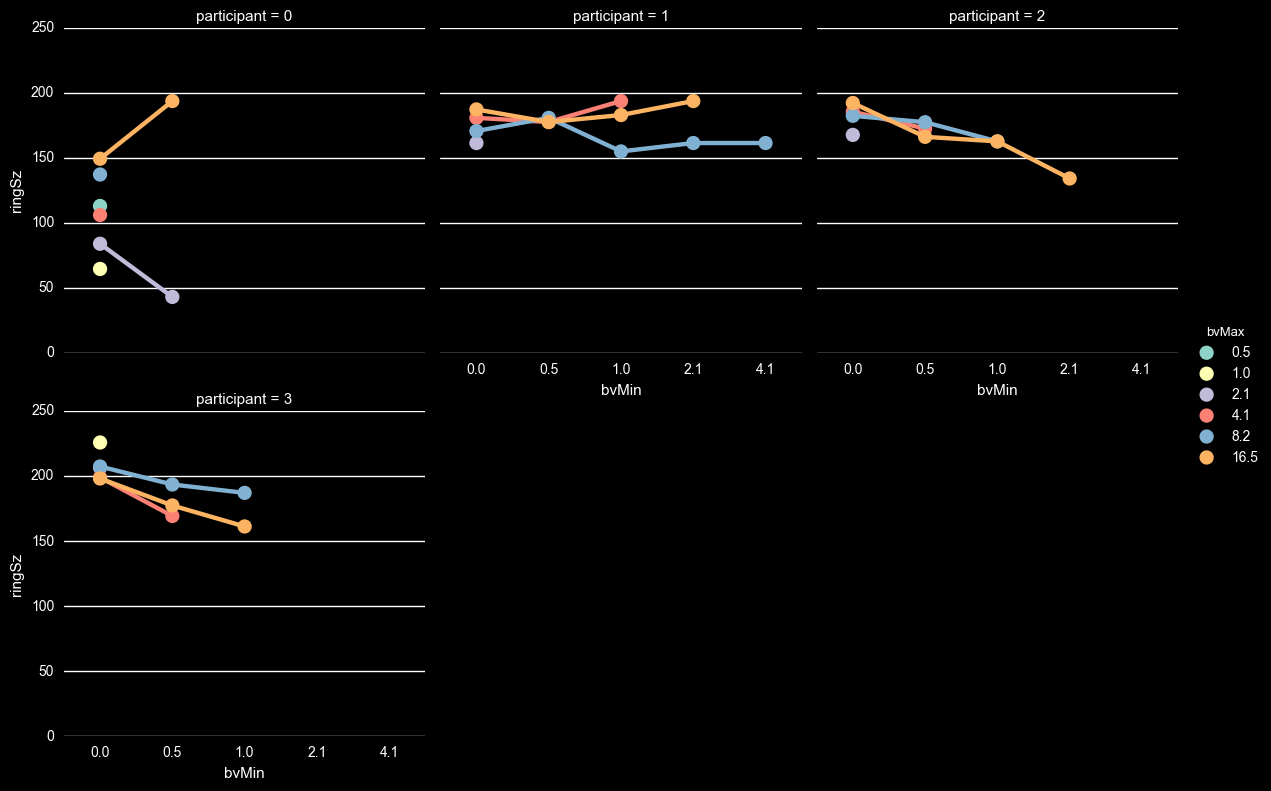

In [12]:
#ss = ds[ds.nf270==1]
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ds[ds.nf270==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ssRing[ssRing.nf270==1], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

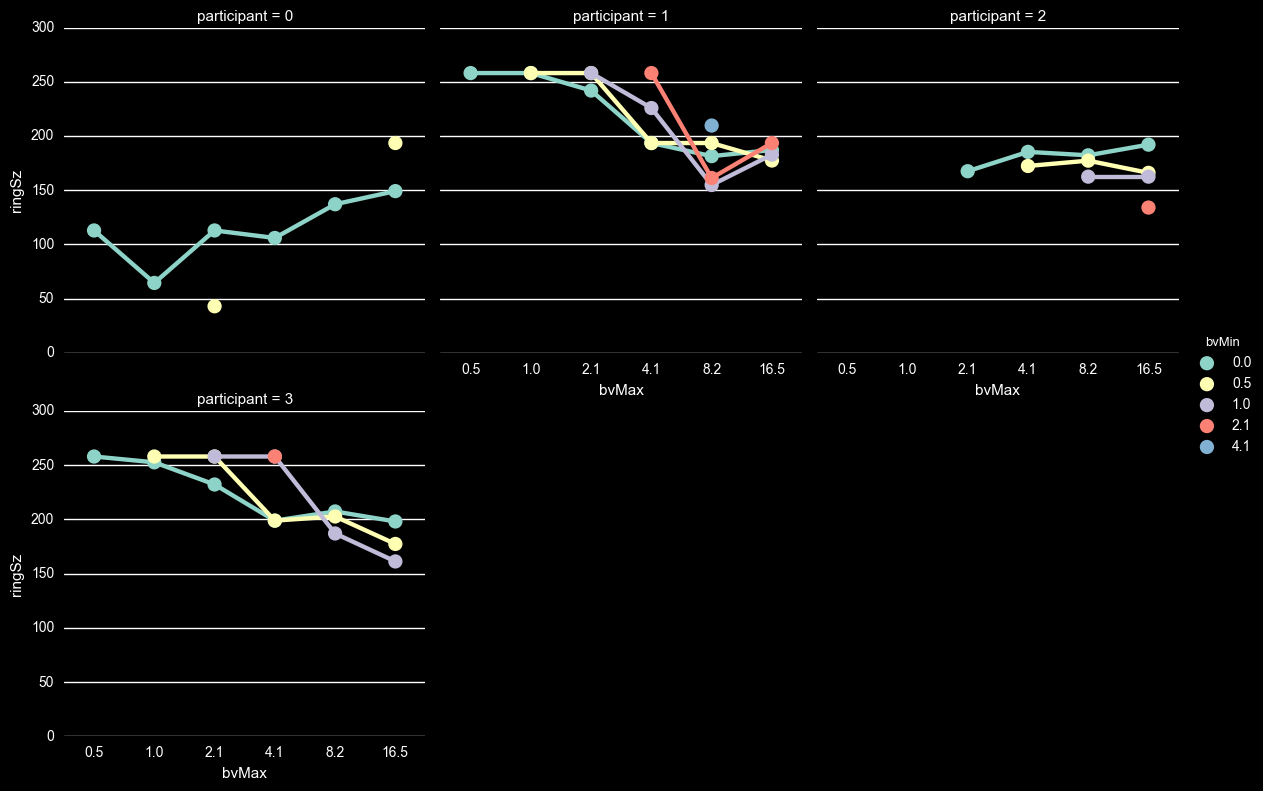

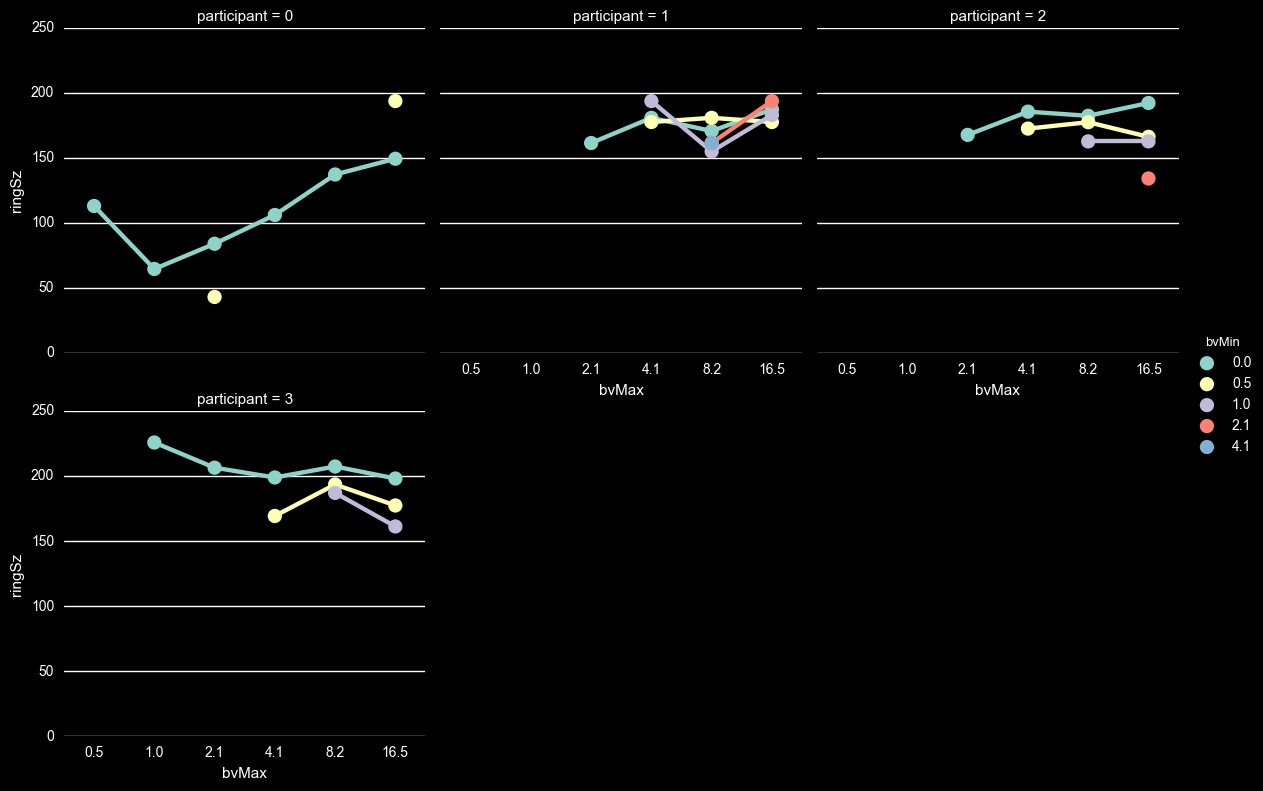

In [13]:
g = sns.factorplot(x='bvMax', y='ringSz', hue='bvMin', col='participant', col_wrap=3,
                   data=ds[ds.nf270==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMax', y='ringSz', hue='bvMin', col='participant', col_wrap=3,
                   data=ssRing[ssRing.nf270==1], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

#### Fast (left)

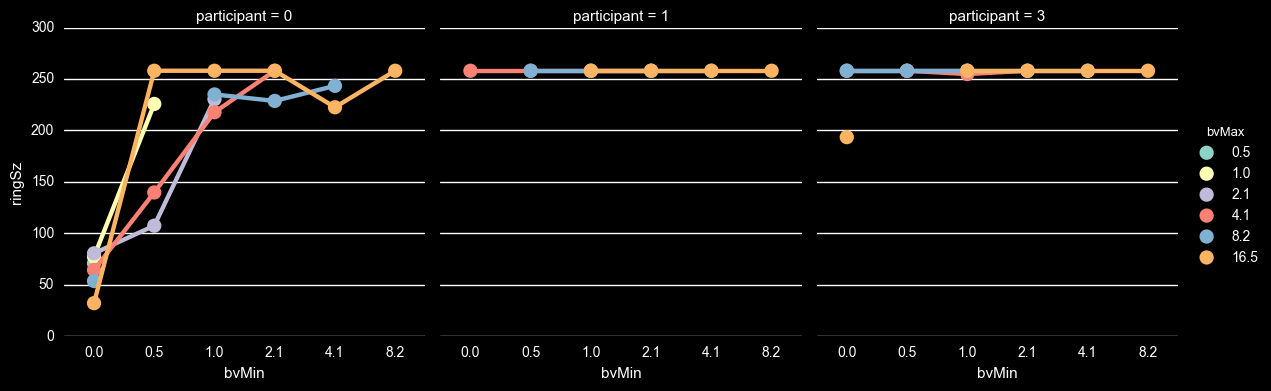

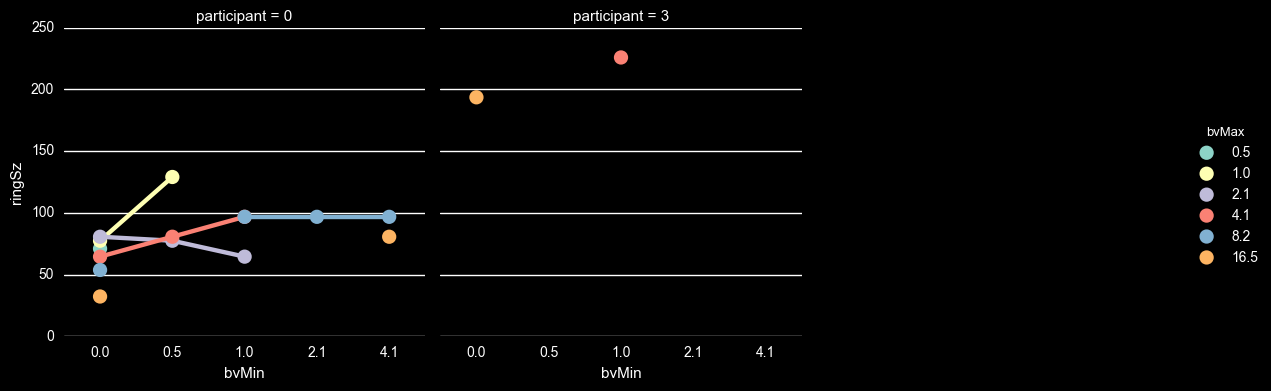

In [14]:
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ds[ds.nf180==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ssRing[ssRing.nf180==1], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)

Meaningfully, the size of the fast-center quickly saturates to the maximum as the tf of both stimuli increases. I.e., the fast-center is still present for intermediate-to-low tf, but only when they are competing with another low-tf stimulus.

#### Patchy/transparent

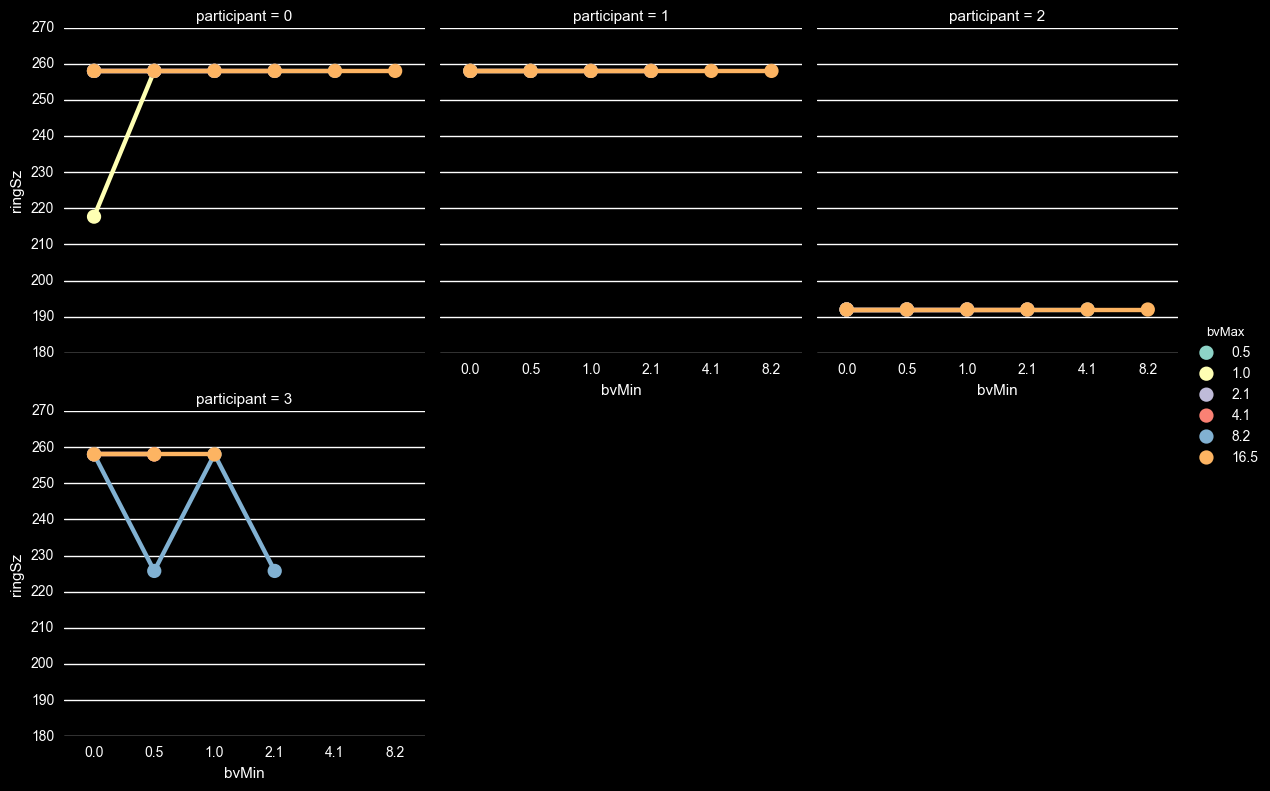

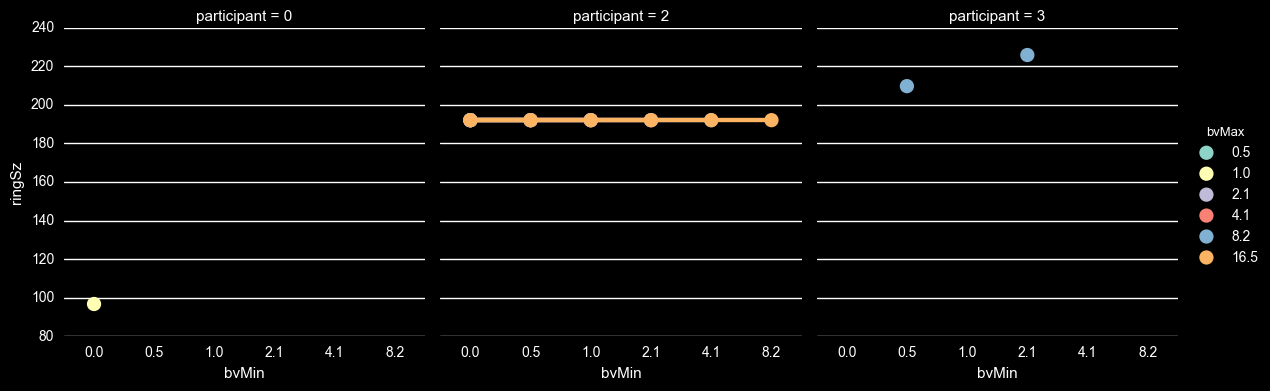

In [15]:
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ds[ds.nf090==1], ci=None, size=4, dodge=.0)
g = sns.factorplot(x='bvMin', y='ringSz', hue='bvMax', col='participant', col_wrap=3,
                   data=ssRing[ssRing.nf090==1], ci=None, size=4, dodge=.0)
#plt.ylim(-0.1,1.1)